In [340]:
# Dependencies
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt

In [302]:
names_dict={}
names=['Homer', 'Marge', 'Bart', 'Lisa', 'Maggie', 'Abraham', 'Barney', 'Moe', 'Ned', 'Ralph', 'Nelson']

for name in names:
    #Set name
    entry_name=name
    
    #Get html for name
    url = f'https://www.behindthename.com/name/{entry_name}/top/united-states'

    #Get results
    results=pd.read_html(url)

    #Write name to df:o
    entry_name=results[1]

    #Names with male & female rankings have 7 columns
    if len(list(entry_name.columns))==7:
        #Drop extra columns
        entry_name=entry_name.drop(columns=[2, 3,4,5,6])
    
    #Names with only male or only female rankings have 4 columns    
    elif len(list(entry_name.columns))==4:
        #Drop extra columns
        entry_name=entry_name.drop(columns=[2, 3])

    #Drop first 2 rows
    entry_name=entry_name.drop([0,1])

    #Rename columns
    entry_name=entry_name.rename(columns = {0:'Year', 1:f'{name} Rank'})

    #Replace empty string and - with nan
    entry_name[f'{name} Rank'].replace('', np.nan, inplace=True)
    entry_name[f'{name} Rank'].replace('-', np.nan, inplace=True)

    #Drop nan
    entry_name=entry_name.dropna()

    #Remove hash from rank
    entry_name[f'{name} Rank']=entry_name[f'{name} Rank'].str[1:]

    #Write year and rank to integer
    entry_name['Year'] = entry_name['Year'].astype(int)
    entry_name[f'{name} Rank'] = entry_name[f'{name} Rank'].astype(int)

    #Filter for years greater than 1990
    entry_name=entry_name[entry_name['Year']>=1990]
    
    #Reset index to year
    entry_name=entry_name.set_index('Year')
    
    #Write dataframe to dictionary
    names_dict[name]=entry_name
    
    print(name)

Homer
Marge
Bart
Lisa
Maggie
Abraham
Barney
Moe
Ned
Ralph
Nelson


In [335]:
#Write data frames to list
data_frames=[]

for name in names:
    data_frames.append(names_dict[name])

#Merge dataframes
names_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Year'], how='outer'), data_frames)

#Drop empty columns
names_merged=names_merged.dropna(how='all', axis=1)

In [336]:
names_merged

,Lisa Rank,Maggie Rank,Abraham Rank,Ralph Rank,Nelson Rank
Year,,,,,
2019,955,295,191,NaN,655
2018,877,293,163,950.0,671
2017,885,248,169,NaN,631
2016,834,242,157,991.0,620
2015,754,241,169,NaN,626
2014,739,238,180,NaN,645
2013,768,232,182,NaN,581
2012,708,247,190,NaN,558
2011,702,229,192,953.0,556


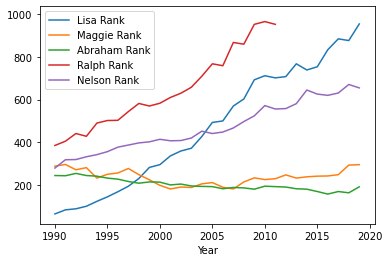

In [342]:
names_merged.plot.line()